# Teste Data Science Elo7 - Parte 1 - Análise exploratória dos dados

## Os dados

O dataset contém 38.507 registros distribuídos em 5 categorias (`Bebê`, `Bijuterias e Jóias`, `Decoração`, `Lembrancinhas`, `Papel e Cia` e `Outros`). Cada registro corresponde a um clique em um produto a partir de um termo de busca no site.

As colunas do dataset são:

- `product_id` - identificação de produto
- `seller_id` - identificação do vendedor 
- `query` - termo de busca inserido pelo usuário
- `search_page` - número da página que o produto apareceu nos resultados de busca (mín 1 e máx 5)
- `position` - número da posição que o produto apareceu dentro da página de busca (mín 0 e máx 38)
- `title` - título do produto  
- `concatenated_tags` - tags do produto inseridas pelo vendedor (as tags estão concatenadas por espaço)
- `creation_date` - data de criação do produto na plataforma do Elo7
- `price` - preço do produto em reais  
- `weight` - peso em gramas da unidade do produto reportado pelo vendedor
- `express_delivery` - indica se o produto é pronta entrega (1) ou não (0)
- `minimum_quantity` - quantidade de unidades mínima necessária para compra
- `view_counts` - número de cliques no produto nos últimos três meses  
- `order_counts` - número de vezes que o produto foi comprado nos últimos três meses
- `category` - categoria do produto


## 1.1 Bibliotecas para importar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt;
import matplotlib.gridspec as gridspec
%matplotlib inline

## 1.2 Preparação dos dados

### Carregar os dados

In [2]:
raw_data = pd.read_csv("elo7_recruitment_dataset.csv")
df = raw_data.copy()
df.head(10)

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração
5,4336889,3436479,dia dos pais,1,37,Álbum de figurinhas dia dos pais,albuns figurinhas pai lucas album fotos,2018-07-11 10:41:33,49.970000,208.0,1,1,1093,NaN,Lembrancinhas
6,7544556,7118324,arranjo de flores para mesa,1,9,Arranjo de Flores - Orquidias,mini arranjos,2016-04-22 13:34:16,23.670000,207.0,1,5,276,NaN,Decoração
7,10869150,5203458,lembrancinha maternidade,5,18,Kit Aromarizador + sacola / Lembrancinha Mater...,bb lembrancinhas maternidade baby lembranca ma...,2017-10-05 00:26:02,12.710000,55.0,0,33,1178,109.0,Lembrancinhas
8,13193769,2933585,chaveiro dia dos pais,1,35,chaveiro dia dos pais,dia pais,2018-07-04 12:47:49,11.420000,6.0,1,23,72,NaN,Lembrancinhas
9,13424151,8530613,manta personalizada,1,20,Manta para bebê personalizada de Nuvem com nome,nascimento manta baby cha bebe vestido bebe,2018-04-03 16:10:51,107.100000,9.0,1,1,639,26.0,Bebê


### Informações sobre o dataset

Eu quero saber quais os tipos das variáveis e também se há valores faltantes em alguma das colunas. Além disso já posso aproveitar para ter uma noção de algumas estatísticas dos valores (média, mediana, std, max, min etc). Vou apenas eliminar as colunas `product_id` e `seller_id` desta análise preliminar pois as estatísticas feitas com estes números não vão trazer qualquer informação relevante. 

In [3]:
print('Informações')
print(df.info())

print('\n\n% de valores faltantes')
print(100*df.isna().sum(axis=0)/len(df))

print('\n\n Estatísticas')
df.drop(['product_id','seller_id'], axis=1).describe()

Informações
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38507 entries, 0 to 38506
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         38507 non-null  int64  
 1   seller_id          38507 non-null  int64  
 2   query              38507 non-null  object 
 3   search_page        38507 non-null  int64  
 4   position           38507 non-null  int64  
 5   title              38507 non-null  object 
 6   concatenated_tags  38505 non-null  object 
 7   creation_date      38507 non-null  object 
 8   price              38507 non-null  float64
 9   weight             38449 non-null  float64
 10  express_delivery   38507 non-null  int64  
 11  minimum_quantity   38507 non-null  int64  
 12  view_counts        38507 non-null  int64  
 13  order_counts       18117 non-null  float64
 14  category           38507 non-null  object 
dtypes: float64(3), int64(7), object(5)
memory usage: 4.4+ MB
N

,search_page,position,price,weight,express_delivery,minimum_quantity,view_counts,order_counts
count,38507.000000,38507.000000,38507.000000,38449.000000,38507.000000,38507.000000,38507.000000,18117.00000
mean,1.491885,16.889007,84.054157,361.836745,0.780637,14.596567,545.520503,27.38141
std,0.980570,11.588534,211.805310,1820.814735,0.413820,43.768937,1416.508602,60.53336
min,1.000000,0.000000,0.070000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,1.000000,6.000000,12.750000,6.000000,1.000000,3.000000,119.000000,8.00000
50%,1.000000,16.000000,28.490000,9.000000,1.000000,7.000000,242.000000,15.00000
75%,2.000000,27.000000,90.000000,107.000000,1.000000,16.000000,521.000000,26.00000
max,5.000000,38.000000,11509.380000,65009.000000,1.000000,3000.000000,45010.000000,2460.00000


### O que fazer com os dados faltantes?

Como podemos ver, mais da metade dos dados da coluna `order_counts` estão faltando. Porém, como esta coluna tem o número de vezes que o produto foi comprado nos últimos três meses, faz sentido substituir os valores faltantes por zero.

No caso da coluna `concatenated_tags`, são apenas 2 os valores nulos e eles podem ser substituídos por uma string vazia, tendo em vista que os valores faltantes correspondem aos casos em que o vendedor deixou o campo das tags em branco.

Já no caso da coluna `weight` faltam apenas 58 valores. Eu poderia substituir estes pela média ou mediana dos demais valores, mas isto pode distorcer muito os resultados.

Os resultados da célula anterior nos mostram que há na coluna `weight` valores de 0 gramas a 65 quilogramas. Outra pergunta razoável é quantos destas entradas do dataset têm massa de 0 gramas.

In [4]:
numzeros = [x for x in df['weight']].count(0)
print(f'\nnúmero de ZEROS na coluna weight = {numzeros} = {100*numzeros/len(df):.1f}%')


número de ZEROS na coluna weight = 4398 = 11.4%


Então 11.4% das entradas da coluna `weight` correspondem a produtos com 0 gramas de massa. Será que estes zeros realmente correspondem a produtos tão leves assim? Que produtos seriam esses? Pelo dataset não tem como saber. De qualquer forma, os valores faltantes desta coluna poderiam ser substituídos por zero. Isto também pode distorcer os resultados, então talvez seja mais seguro simplesmente eliminar as 58 entradas do dataset.

### Então, resumindo o que vamos fazer com os dados faltantes:

- `order_counts`: substituir por zero 
- `concatenated_tags`: substituir por string vazia
- `weight`: remover as entradas do dataset

In [5]:
df['order_counts'].fillna(0, inplace=True)
df['concatenated_tags'].fillna('', inplace=True)
df.dropna(inplace=True)
df.drop(['product_id','seller_id'], axis=1).describe()

,search_page,position,price,weight,express_delivery,minimum_quantity,view_counts,order_counts
count,38449.000000,38449.000000,38449.000000,38449.000000,38449.000000,38449.000000,38449.000000,38449.000000
mean,1.491690,16.892949,84.122337,361.836745,0.780540,14.603163,545.966397,12.901480
std,0.980134,11.589395,211.946962,1820.814735,0.413886,43.799143,1417.455092,43.742106
min,1.000000,0.000000,0.070000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,6.000000,12.760000,6.000000,1.000000,3.000000,119.000000,0.000000
50%,1.000000,16.000000,28.530000,9.000000,1.000000,7.000000,243.000000,0.000000
75%,2.000000,27.000000,90.000000,107.000000,1.000000,16.000000,521.000000,14.000000
max,5.000000,38.000000,11509.380000,65009.000000,1.000000,3000.000000,45010.000000,2460.000000


### Variáveis

- Qualitativas
    - Ordinais
        - `seller_id`
        - `product_id`
        - `creation_date`
    - Nominais
        - `query`
        - `title`
        - `concatenated_tags`
        - `category`
        - `express_delivery`
- Quantitativas
    - `price`
    - `weight`
    - `search_page`
    - `position`
    - `minimum_quantity`
    - `view_counts`
    - `order_counts`

Sempre é possível criar novas variáveis a partir das que já estão presentes no dataset. Estas novas variáveis podem ser úteis para a análise, por exemplo o caso usar uma variável qualitativa para criar uma variável quantitativa. Seguem algumas propostas para novas variáveis:

- Quantitativas
    - `number_of_days`: número de dias desde a criação do produto na plataforma até uma data arbitrária. Idealmente esta data seria a data na qual os datos foram coletados do sistema. Como não temos acesso a este valor, podemos usar a data de hoje.
    - `number_of_tags`: número de tags. Criada a partir da variável `concatenated_tags`. A ideia desta variável é obter medir de alguma forma a quantidade de "informação" fornecida pelo vendedor para a descrição do seu produto.
    - `len_tags`: análoga à `number_of_tags`, apenas calculada de forma levemente diferente, calculando-se o número de caracteres da string `concatenated_tags`. 
    - `len_title`: análoga à `len_tags` mas com o número de caracteres de `title`
    - `len_query`: análoga à `len_tags` mas com o número de caracteres de `query`
    - `price_per_weight`: preço do produto dividido por seu peso. Criada a partir das variáveis `price` e `weight`. Temos apenas que tomar cuidado com o fato mencionado logo acima que 11.4% dos valores de `weight` são nulos. Isso gera um valor inf para a variável calculada a partir da divisão de `price` por `weight`. Uma forma de contornar este problema seria remover todas as entradas com `weight` nulo, porém isso implicaria jogar 11.4% dos dados fora. Outra abordagem um pouco melhor é fazer um "shift" nos dados do peso, somando 1 grama a todos. Desta forma os 11.4% cuja massa era 0 gramas agora passam para a categoria de 1 grama. Isto faz pouca diferença para os valores grandes de `weight` mas é algo significativo quando consideramos somar 1 grama a uma entrada cuja massa original era 1 grama. Um aumento de 100%. Desta forma, essa soma de 1 grama será feita apenas para calcular a nova variável `price_per_weight` e não alterará o valor original da variável `weight`. Ou seja, esta nova variável (que poderia ser chamada `price_per_shifted_weight` mas é melhor evitar um nome tão grande) fica definida como:
    $\mbox{price_per_weight} = \frac{\mbox{price}}{\mbox{weight}+1}$
    - `order_probability`: uma estimativa da probabilidade de que um produto visualizado seja de fato comprado. Esta variável é calculada fazendo-se a razão entre `order_counts` e `view_counts`.
    - `views_per_day`: uma média da quantidade de visualizações por dia do produto desde o dia de sua criação. Calculada como a razão entre `view_counts` e `number_of_days`.
    - `orders_per_day`: uma média da quantidade de vendas por dia do produto desde o dia de sua criação. Calculada como a razão entre `order_counts` e `number_of_days`.


**O.B.S. 1:** Também é possível criar variáveis análogas à `number_of_tags` a partir de `title` e `query`, mas depois de analisar o comportamento destas variáveis eu optei por manter apenas `len_tags`, `len_title` e `len_query`.

### `number_of_days`

**O.B.S. 2:** `creation_date` é uma data, desta forma é melhor converter estes dados que estão em formato string para objetos **datetime** para podermos calcular `number_of_days`.

In [6]:
df['creation_date'] = pd.to_datetime(df['creation_date'])
print(df['creation_date'].head())

# number_of_days
date_today = pd.to_datetime('today')
df['number_of_days'] = [(date_today-day).days for day in df['creation_date']]
df['number_of_days'].describe()

0   2015-11-14 19:42:12
1   2018-04-04 20:55:07
2   2018-10-13 20:57:07
3   2017-02-27 13:26:03
4   2017-05-09 13:18:38
Name: creation_date, dtype: datetime64[ns]


count    38449.000000
mean      1367.571276
std        507.013956
min        482.000000
25%       1035.000000
50%       1255.000000
75%       1556.000000
max       4557.000000
Name: number_of_days, dtype: float64

### `number_of_tags`, `number_of_words_in_query`, `number_of_words_in_title`

In [7]:
print('\n#Algumas entradas da variável concatenated_tags para visualização\n')
import random
num = 30
rand = random.randint(0, len(df)-num)
for x in df['concatenated_tags'].iloc[rand:rand+num]:
    print(x)


#Algumas entradas da variável concatenated_tags para visualização

planner planner's futura compra acessorios lista desejos inserts planner refil folhas a5 fichario pequeno
porta maternidade porta maternidade ursos
colecao mandalas
batismo
suculentas cozinha vasos decorativos
bujo cadernos flexivel
porta papel higienico arte croche croche porta
tapetes croche
adesivos personalizados cha bebe
pingente foto gravada
casa cortinas cama/mesa/banho
aliancas aliancas compromisso
sapatinho bebe tenis menino tenis azul
tapetes fios la
long drink dia professores
flor papel casamento aniversario flores papel flores papel
almofadas dia pais
tabuadas personalizadas
coisinhas apt
lembrancinha aniversario
chinelo 3,50 anos 80 lembrancas casamento lembrancinhas aniversario chinelos lembrancas padrinhos tropical casamento praia lembrancinha copo
lustres
ponteira lapis dia pais porta treco porta canetas sapatos eva ponteiras decoradas volta aulas
body bebe infantil vovo vovo
sereia lembrancinhas festa 

Checando por amostragem alguns valores da variável `concatenated_tags`, é possível ver que há casos em que há tags diferentes separadas por `/`, por `,`, por `.`, `-` etc. Há também os casos em que o hífem por exemplo é usado para criar uma tag composta de duas ou mais palavras e há ainda diversos casos de tags separadas que fariam mais sentido se estivessem juntas, como por exemplo "15 anos", "dia dos pais". Infelizmente as tags "15" e "anos" serão contadas separadamente.

Quanto às tags separadas que talvez fizessem mais sentido juntas, é bastante difícil de julgar e determinar o que seria melhor em cada caso. Assim, provavelmente a melhor saída é deixar estas tags separadas mesmo. Porém talvez seja melhor remover as tags que forem apenas um número como "15", "30", "2020".

As demais tags que contêm outro tipo de separador (`/`, `,`, `.`, `-`, `_`, `*`) no meio do texto podem ser separadas. Um efeito disso é que eventualmente há tags que são números como "1.50" ou "1,7" ou datas como "21/01/2020". Após a separação destas, sobram mais tags que são apenas dígitos e, pelo mesmo critério descrito no parágrafo anterior, não serão contadas.

Para fazer esse tratamento do texto, faz sentido criar uma função que receba uma string e retorne uma lista de tags já tratadas e separadas. Esta função também será útil depois quando formos analisar a variável `query` e a variável `title`. Então já é prudente fazer com que esta função remova acentos e deixe o texto em caixa baixa, o que é uma preocupação para a variável `title` por exemplo.

In [8]:
from unidecode import unidecode

def clean_text(text):
    text = str(text)
    text = unidecode(text)
    text = text.lower()
    for t in ',.:;-_/\\+=()[]<>^~?!#*%':
        text = text.replace(t, ' ')
    return text

def clean_and_separate_tags(text):
    text = clean_text(text)
    tags = [t for t in text.split() if not t.isdigit()]
    return tags

all_tags = list(pd.core.common.flatten([clean_and_separate_tags(t) for t in df['concatenated_tags']]))
for t in set(all_tags[:20]):
    print(t)

cartao
tag
drink
canecas
mdf
adesivo
expositor
visita
jogo
box
menino
copos
lencol
t
berco
panfletos
mandala
adesivos
long


In [9]:
# number_of_tags
test_df = df[['concatenated_tags', 'title', 'query', 'category']].copy()
test_df['number_of_tags'] = [len(clean_and_separate_tags(t)) for t in test_df['concatenated_tags']]
print(test_df['number_of_tags'].head())
test_df['number_of_tags'].describe()

0    2
1    9
2    1
3    6
4    3
Name: number_of_tags, dtype: int64


count    38449.000000
mean         5.907800
std          6.043426
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        369.000000
Name: number_of_tags, dtype: float64

Analogamente, defino as variáveis associadas ao número de palavras em `title` e `query`, bem como as variáveis associadas ao número de caracteres de `concatenated_tags`, `title` e `query`. Após definir estas variáveis eu posso analisar a correlação entre elas através de uma matriz de correlação.

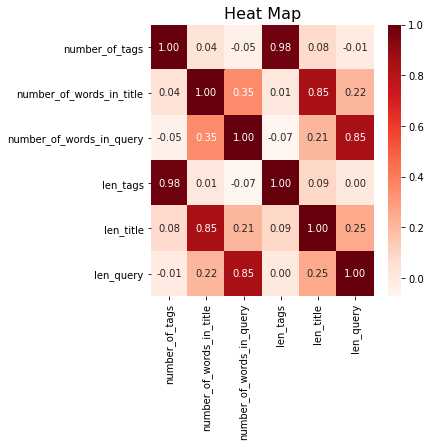

In [10]:
test_df['number_of_words_in_title'] = [len(clean_and_separate_tags(t)) for t in test_df['title']]
test_df['number_of_words_in_query'] = [len(clean_and_separate_tags(t)) for t in test_df['query']]

test_df['len_tags'] = [len(clean_text(t)) for t in test_df['concatenated_tags']]
test_df['len_title'] = [len(clean_text(t)) for t in test_df['title']]
test_df['len_query'] = [len(clean_text(t)) for t in test_df['query']]

plt.figure(figsize=(5, 5))
sns.heatmap(test_df.corr(), annot=True, fmt='.2f', cmap='Reds')
plt.title('Heat Map', fontsize=16)
plt.show()

Fica claro que os pares `number_of_...` e `len_...` são bastante correlacionados, então faria sentido escolher apenas uma das variantes (número de palavras ou número de caracteres). Para decidir qual dos dois usar eu vou analisar a distribuição dos valores destas variáveis através dos seus histogramas e de seus gráficos do tipo boxplot.

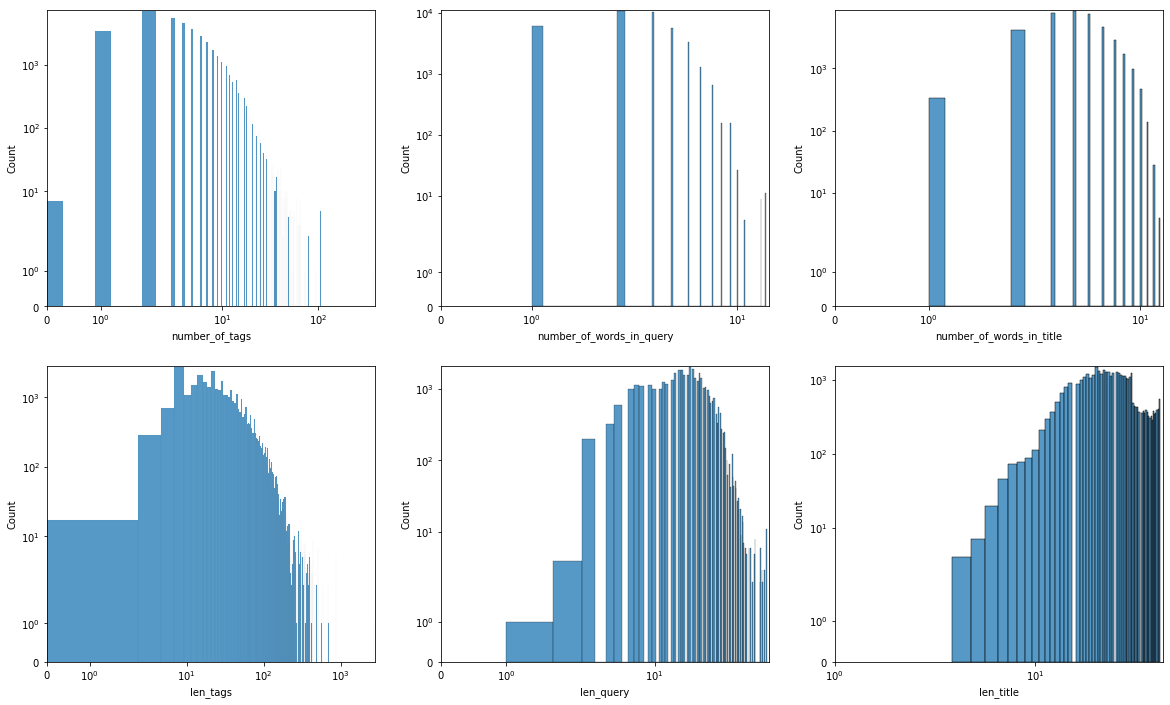

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

sns.histplot(x='number_of_tags', data=test_df, ax=axs[0][0])
sns.histplot(x='number_of_words_in_query', data=test_df, ax=axs[0][1])
sns.histplot(x='number_of_words_in_title', data=test_df, ax=axs[0][2])

sns.histplot(x='len_tags', data=test_df, ax=axs[1][0])
sns.histplot(x='len_query', data=test_df, ax=axs[1][1])
sns.histplot(x='len_title', data=test_df, ax=axs[1][2])

for ax in [axs[i][j] for i in range(2) for j in range(3)]:
    ax.set_yscale('symlog')
    ax.set_xscale('symlog')
    ax.set_xlim(left=0)

axs[1][2].set_xlim(left=1)

plt.show()

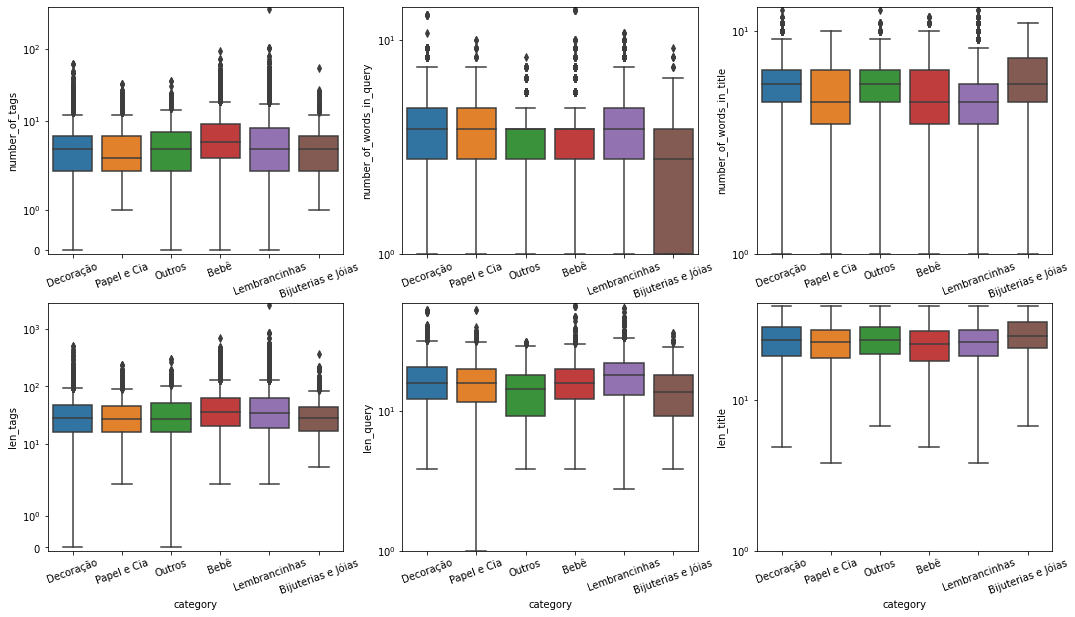

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(x=test_df['category'], y=test_df['number_of_tags'], ax=axs[0][0])
sns.boxplot(x=test_df['category'], y=test_df['number_of_words_in_query'], ax=axs[0][1])
sns.boxplot(x=test_df['category'], y=test_df['number_of_words_in_title'], ax=axs[0][2])

sns.boxplot(x=test_df['category'], y=test_df['len_tags'], ax=axs[1][0])
sns.boxplot(x=test_df['category'], y=test_df['len_query'], ax=axs[1][1])
sns.boxplot(x=test_df['category'], y=test_df['len_title'], ax=axs[1][2])

for ax in [axs[i][j] for i in range(2) for j in range(3)]:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
    ax.set_yscale('symlog')

axs[0][0].set_ylim(bottom=-1e-1)
axs[0][1].set_ylim(bottom=1)
axs[0][2].set_ylim(bottom=1)

axs[1][0].set_ylim(bottom=-1e-1)
axs[1][1].set_ylim(bottom=1)
axs[1][2].set_ylim(bottom=1)

plt.show()

A distribuição mostrada nos histogramas é um pouco menos "esburacada" para as variáveis do tipo `len_...` do que para as do tipo `number_of...`. Os boxplots mostram comportamentos bastante similares entre os dois tipos, com exceção da variável `len_title` que pelo menos no critério outliers possui um comportamento melhor. Desta forma eu vou escolher apenas as variáveis `len_tags`, `len_query` e `len_title`. 

In [13]:
df['len_tags'] = [len(clean_text(t)) for t in df['concatenated_tags']]
df['len_title'] = [len(clean_text(t)) for t in df['title']]
df['len_query'] = [len(clean_text(t)) for t in df['query']]

### `price_per_weight`

In [14]:
df['price_per_weight'] = df['price']/(df['weight']+1)
print(df['price_per_weight'].head())
df['price_per_weight'].describe()

0      0.143122
1      8.630000
2      0.027277
3    118.770004
4      0.377579
Name: price_per_weight, dtype: float64


count    38449.000000
mean        14.363802
std         81.226055
min          0.000034
25%          0.228696
50%          1.327778
75%          7.276250
max       5563.860000
Name: price_per_weight, dtype: float64

### `order_probability`

In [15]:
df['order_probability'] = df['order_counts']/df['view_counts']
print(df['order_probability'].head())
df['order_probability'].describe()

0    0.000000
1    0.000000
2    0.000000
3    0.005556
4    0.000000
Name: order_probability, dtype: float64


count    38449.000000
mean         0.033163
std          0.085231
min          0.000000
25%          0.000000
50%          0.000000
75%          0.042831
max          5.500000
Name: order_probability, dtype: float64

Esta variável já nos mostra algo de estranho. Se `order_probability` for de fato um estimador para a probabilidade de que uma visualização venha a se tornar uma venda o seu valor não poderia ser maior do que 1. No entanto vemos acima que o valor máximo desta variável é 5.5. Vou contar quantos valores maiores do que 1 há nesta coluna.

In [16]:
num_greater_than_one = len([x for x in df['order_probability'] if x>1])
print(f'\nnúmero de valores >1 na coluna order_probability = {num_greater_than_one} = {100*num_greater_than_one/len(df):.1f}%')


número de valores >1 na coluna order_probability = 27 = 0.1%


São poucos valores mas de fato há algo estranho nestas entradas. São casos onde temos `order_counts` maior do que `view_counts`, ou seja, correspondem a alguma situação na qual o produto foi comprado sem ser visualizado. Como são poucos valores, talvez seja melhor retirar estes valores do dataset para que a variável `order_probability` corresponda de fato a uma probabilidade. 

In [17]:
df = df[df['order_probability'] <= 1]
df['order_probability'].describe()

count    38422.000000
mean         0.031830
std          0.062687
min          0.000000
25%          0.000000
50%          0.000000
75%          0.042665
max          1.000000
Name: order_probability, dtype: float64

### `views_per_day`

In [18]:
df['views_per_day'] = df['view_counts']/df['number_of_days']
df['views_per_day'].describe()

count    38422.000000
mean         0.447810
std          1.304109
min          0.000343
25%          0.089224
50%          0.187845
75%          0.418852
max         53.203310
Name: views_per_day, dtype: float64

### `orders_per_day`

In [19]:
df['orders_per_day'] = df['order_counts']/df['number_of_days']
df['views_per_day'].describe()

count    38422.000000
mean         0.447810
std          1.304109
min          0.000343
25%          0.089224
50%          0.187845
75%          0.418852
max         53.203310
Name: views_per_day, dtype: float64

## 1.3 Análise dos dados

Agora que os dados estão carregados e limpos, eu posso começar com análises estatísticas buscando responder perguntas que possam levar a uma compreensão melhor dos dados que tenho em mãos.

A lista atualizada de variáveis é:

- qualitativas:
    - `product_id` - identificação de produto
    - `seller_id` - identificação do vendedor 
    - `query` - termo de busca inserido pelo usuário
    - `title` - título do produto  
    - `concatenated_tags` - tags do produto inseridas pelo vendedor (as tags estão concatenadas por espaço)
    - `creation_date` - data de criação do produto na plataforma do Elo7
    - `express_delivery` - indica se o produto é pronta entrega (1) ou não (0)
    - `category` - categoria do produto

- quantitativas:
    - `search_page` - número da página que o produto apareceu nos resultados de busca (mín 1 e máx 5)
    - `position` - número da posição que o produto apareceu dentro da página de busca (mín 0 e máx 38)
    - `price` - preço do produto em reais  
    - `weight` - peso em gramas da unidade do produto reportado pelo vendedor
    - `minimum_quantity` - quantidade de unidades mínima necessária para compra
    - `view_counts` - número de cliques no produto nos últimos três meses  
    - `order_counts` - número de vezes que o produto foi comprado nos últimos três meses
    - `number_of_days`: número de dias desde a data de criação do produto até o dia que o programa for rodado
    - `len_tags`: número de caracteres da string `concatenated_tags`
    - `len_title`: número de caracteres da string `title`
    - `len_query`: número de caracteres da string `query`
    - `price_per_weight`: `price` dividido por `weight`+1
    - `order_probability`: razão entre `order_counts` e `view_counts`
    - `views_per_day`: razão entre `view_counts` e `number_of_days`
    - `orders_per_day`: razão entre `order_counts` e `number_of_days`



### Algumas perguntas interessantes que podemos tentar responder

- frequências
    - quais são as tags mais frequentes?
    - quais são as palavras mais frequentes dentre todas as queries?

- quantos `product_id` pertencem a cada `category`?
- quantos `seller_id` vendem em cada `category`?
- quantos `view_counts` há em cada `category`?
- quantos `order_counts` há em cada `category`?
- quantos produtos são para pronta entrega e quantos não são?

- quais as distribuições de valores de cada variável quantitativa?
- qual a correlação entre as variáveis quantitativas?


### Estatísitcas feitas com todas as variáveis (inclusive as novas)

In [20]:
df.drop(['product_id','seller_id'], axis=1).describe()

,search_page,position,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,number_of_days,len_tags,len_title,len_query,price_per_weight,order_probability,views_per_day,orders_per_day
count,38422.000000,38422.000000,38422.000000,38422.000000,38422.000000,38422.000000,38422.000000,38422.000000,38422.000000,38422.000000,38422.000000,38422.000000,38422.000000,38422.000000,38422.000000,38422.000000
mean,1.491802,16.892145,84.109725,361.075191,0.780647,14.609000,546.285461,12.838998,1367.693535,45.421295,31.673755,19.922701,14.366134,0.031830,0.447810,0.010678
std,0.980284,11.589229,211.951291,1812.845573,0.413814,43.813837,1417.890272,43.288700,507.009642,47.148731,11.980852,9.339498,81.253071,0.062687,1.304109,0.036315
min,1.000000,0.000000,0.070000,0.000000,0.000000,0.000000,1.000000,0.000000,482.000000,0.000000,3.000000,1.000000,0.000034,0.000000,0.000343,0.000000
25%,1.000000,6.000000,12.760000,6.000000,1.000000,3.000000,119.000000,0.000000,1035.000000,18.000000,23.000000,13.000000,0.228834,0.000000,0.089224,0.000000
50%,1.000000,16.000000,28.520000,9.000000,1.000000,7.000000,243.000000,0.000000,1255.000000,32.000000,30.000000,19.000000,1.327889,0.000000,0.187845,0.000000
75%,2.000000,27.000000,90.000000,107.000000,1.000000,16.000000,521.000000,14.000000,1556.000000,57.000000,39.000000,25.000000,7.272601,0.042665,0.418852,0.010972
max,5.000000,38.000000,11509.380000,65009.000000,1.000000,3000.000000,45010.000000,2460.000000,4557.000000,2670.000000,60.000000,89.000000,5563.860000,1.000000,53.203310,2.318567


### Frequência das tags

In [21]:
from collections import Counter
tag_counts = Counter(all_tags)

print(f'número de tags        : {len(all_tags)}')
print(f'número de tags únicas : {len(set(all_tags))}')

print()
popular_tags = sorted(tag_counts, key = tag_counts.get, reverse = True)
print(f"{'# tag':26s} {'count':10s}")
print('-'*35)
for t in popular_tags[:30]:
    print(f'{t:20s} {tag_counts[t]:10d}')

número de tags        : 227149
número de tags únicas : 7596

# tag                      count     
-----------------------------------
lembrancinhas              5914
bebe                       5725
maternidade                5047
festa                      4832
lembrancinha               3639
casamento                  3292
dia                        3285
cha                        3186
kit                        3177
aniversario                2875
decoracao                  2779
anos                       2709
pais                       2666
batizado                   2659
niver                      1978
quarto                     1815
porta                      1710
personalizada              1567
baby                       1370
casa                       1295
personalizadas             1291
lembranca                  1254
lembrancas                 1244
quadros                    1236
croche                     1191
caneca                     1190
personalizados             1176
p

### Frequência das palavras nas queries

In [22]:
all_queries = list(pd.core.common.flatten([clean_and_separate_tags(t) for t in df['query']]))
querie_counts = Counter(all_queries)

print(f'número de palavras nas queries        : {len(all_queries)}')
print(f'número de palavras únicas nas queries : {len(set(all_queries))}')

print()
popular_queries = sorted(querie_counts, key = querie_counts.get, reverse = True)
print(f"{'# palavra':25s} {'count':10s}")
print('-'*35)
for t in popular_queries[:30]:
    print(f'{t:20s} {querie_counts[t]:10d}')

número de palavras nas queries        : 113456
número de palavras únicas nas queries : 2480

# palavra                 count     
-----------------------------------
de                        10274
lembrancinha               4611
para                       3930
dia                        3065
dos                        2981
pais                       2912
maternidade                2299
lembrancinhas              2009
kit                        1699
bebe                       1532
em                         1308
personalizada              1293
festa                      1209
croche                     1121
personalizado              1068
porta                      1045
cha                         994
anos                        947
decoracao                   886
batizado                    871
presente                    808
parede                      800
papel                       767
tapete                      748
com                         711
eva                         670
an

### Distribuição de `product_id`, `seller_id`, `view_counts` e `order_counts` entre cada `category`

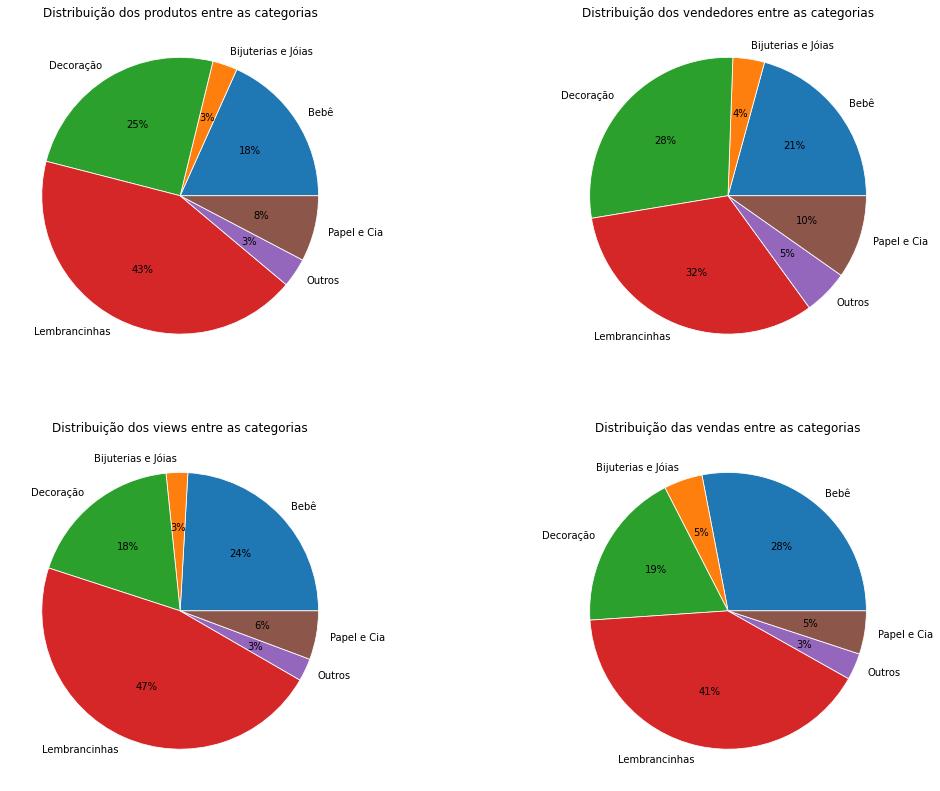

In [23]:
categories = ['Lembrancinhas', 'Decoração', 'Bebê', 'Papel e Cia', 'Outros', 'Bijuteria e Jóias']

fig, axs = plt.subplots(2,2, figsize=(18, 14))

data = df.groupby('category')['product_id'].nunique()
axs[0][0].pie(data.values, labels=data.index,
        autopct='%.0f%%', wedgeprops={'linewidth':0.8,'edgecolor':'white'})

data = df.groupby('category')['seller_id'].nunique()
axs[0][1].pie(data.values, labels=data.index,
        autopct='%.0f%%', wedgeprops={'linewidth':0.8,'edgecolor':'white'})

data = df.groupby('category')['view_counts'].sum()
axs[1][0].pie(data.values, labels=data.index,
        autopct='%.0f%%', wedgeprops={'linewidth':0.8,'edgecolor':'white'})

data = df.groupby('category')['order_counts'].sum()
axs[1][1].pie(data.values, labels=data.index,
        autopct='%.0f%%', wedgeprops={'linewidth':0.8,'edgecolor':'white'})

axs[0][0].set_title('Distribuição dos produtos entre as categorias')
axs[0][1].set_title('Distribuição dos vendedores entre as categorias')
axs[1][0].set_title('Distribuição dos views entre as categorias')
axs[1][1].set_title('Distribuição das vendas entre as categorias')
plt.show()


Podemos ver que nos casos acima a categoria **Lembrancinhas** é mais concentrda, especialmente no caso de `view_counts` no qual esta categoria concentra quasse metade das entradas. As categorias **Bebê** e **Decoração** alternam entre o segundo e o terceiro lugar de concentração. Há mais vendedores e produtos na categoria **Decoração** do que em **Bebê**, porém há mais `view_counts` e `order_counts` na categoria **Bebê** do que em **Decoração**. As demais categorias somadas ficam com os restantes 14% a 17% das entradas.


### Produtos para pronta entrega

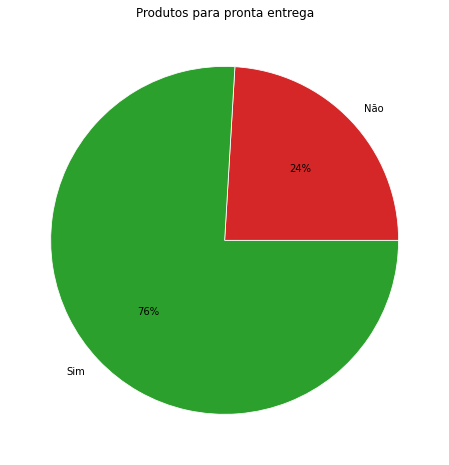

In [24]:
plt.figure(figsize=(8, 8))
labels = {0:'Não', 1:'Sim'}
data = df.groupby('express_delivery')['product_id'].nunique()
plt.pie(data.values, labels=[labels[i] for i in data.index], colors=['tab:red', 'tab:green'],
        autopct='%.0f%%', wedgeprops={'linewidth':0.8,'edgecolor':'white'})
plt.title('Produtos para pronta entrega')
plt.show()

### Correlação entre as variáveis quantitativas

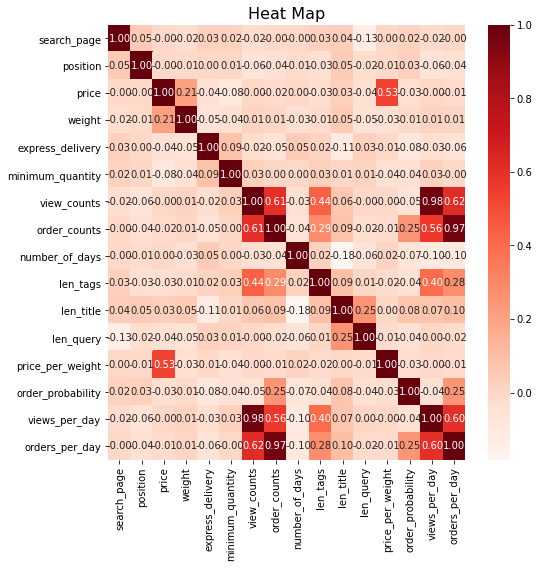

In [25]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.drop(['product_id','seller_id'], axis=1).corr(), annot=True, fmt='.2f', cmap='Reds')
plt.title('Heat Map', fontsize=16)
plt.show()

É interessante como quase não há correlação entre as variáveis. Apenas há correlações positivas bastante fracas entre `price` e `weight`, entre `number_of_tags` e `order_counts` e entre `number_of_tags` e `view_counts`. Ainda temos uma correlação positiva moderada entre `view_counts` e `order_counts`.

A ideia de propor a criação da variável `len_tags` revelou então esta correlação positiva desta variável tanto com `view_counts` (correlação de 0.44) quanto com `order_counts` (correlação de 0.29). Similarmente, as variáveis `len_title` e `len_query` possuem uma correlação de 0.25.

Já a outra variável proposta, `number_of_days` não apresenta correlação apreciável com nenhuma outra variável.
A hipótese inicial para esta variável era de que talvez houvesse uma correlação entre ela e `view_counts` e `order_counts`, mas pelo visto os produtos mais antigos não são necessariamente mais vistos ou mais vendidos.

Para as demais variáveis novas (`price_per_weight`, `order_probability`, `views_per_day` e `orders_per_day`), as únicas correlações relevantes que surgem são entre estas variáveis e as variáveis que foram usadas para calculá-las, ou seja, há correlação entre `price_per_weight` e `price`, entre `order_probability` e `order_counts`, entre `views_per_day` e `view_counts` e entre `orders_per_day` e `order_counts`, mas isso já era de se esperar.

### Distribuições dos valores das variáveis

Os gráficos a seguir são histogramas com as contagens de número de ocorrências de cada valor das variáveis quantitativas. Cada figura tem os histogramas para os dados para ambos os casos: `express_delivery `=0 e `express_delivery`=1 (para aproveitar e verificar se há alguma diferença no comportamento das variáveis associadas aos produtos que são pronta entrega ou não). 

A visualização dos histogramas das variáveis `price`, `weight`, `price_per_weight`, `len_tags`, `len_query` e `len_title` ficou melhor em escala logarítmica tanto no eixo $x$ quanto no eixo $y$.

Abaixo seguem os histogramas destas variáveis.

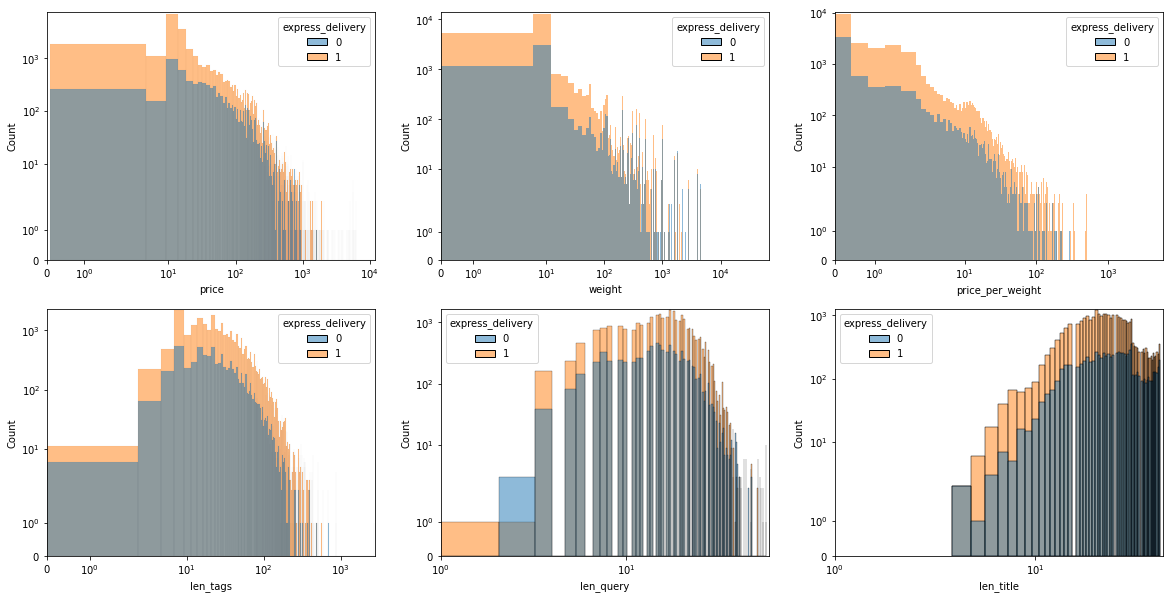

In [26]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(x='price', hue='express_delivery', data=df, ax=axs[0][0])
sns.histplot(x='weight', hue='express_delivery', data=df, ax=axs[0][1])
sns.histplot(x='price_per_weight', hue='express_delivery', data=df, ax=axs[0][2])

sns.histplot(x='len_tags', hue='express_delivery', data=df, ax=axs[1][0])
sns.histplot(x='len_query', hue='express_delivery', data=df, ax=axs[1][1])
sns.histplot(x='len_title', hue='express_delivery', data=df, ax=axs[1][2])

for ax in [axs[i][j] for i in range(2) for j in range(3)]:
    ax.set_yscale('symlog')
    ax.set_xscale('symlog')
    ax.set_xlim(left=0)

axs[1][1].set_xlim(left=1)
axs[1][2].set_xlim(left=1)

plt.show()

Os histogramas de `view_counts`, `order_counts`, `minimum_quantity`, `views_per_day` e `orders_per_day` também ficaram melhor em escala logarítmica tanto no eixo $x$ quanto no eixo $y$ e os gráficos estão abaixo.

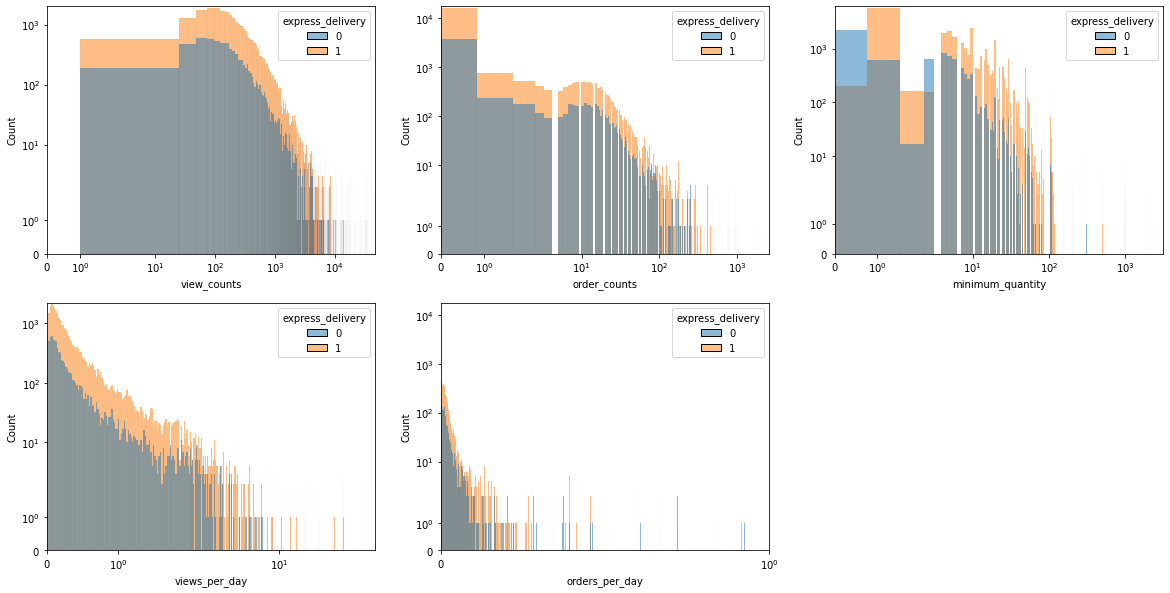

In [27]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(x='view_counts', hue='express_delivery', data=df, ax=axs[0][0])
sns.histplot(x='order_counts', hue='express_delivery', data=df, ax=axs[0][1])
sns.histplot(x='minimum_quantity', hue='express_delivery', data=df, ax=axs[0][2])

sns.histplot(x='views_per_day', hue='express_delivery', data=df, ax=axs[1][0])
sns.histplot(x='orders_per_day', hue='express_delivery', data=df, ax=axs[1][1])

axs[1][2].axis('off')

for ax in [axs[i][j] for i in range(2) for j in range(3)][:-1]:
    ax.set_yscale('symlog')
    ax.set_xscale('symlog')
    ax.set_xlim(left=0)

axs[1][1].set_xlim(right=1)
   
plt.show()

Já a visualização das demais variáveis (`number_of_days`, `search_page`, `position` e `order_probability`) ficou melhor em escala logarítmica apenas no eixo $y$.

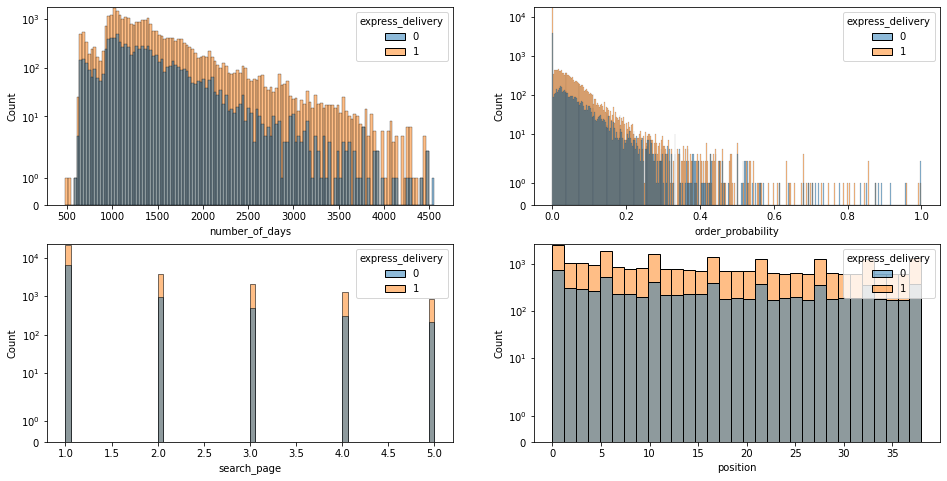

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

sns.histplot(x='number_of_days', hue='express_delivery', data=df, ax=axs[0][0])
sns.histplot(x='order_probability', hue='express_delivery', data=df, ax=axs[0][1])
sns.histplot(x='search_page', hue='express_delivery', data=df, ax=axs[1][0])
sns.histplot(x='position', hue='express_delivery', data=df, ax=axs[1][1])


for ax in [axs[i][j] for i in range(2) for j in range(2)]:
    ax.set_yscale('symlog')

Os histogramas revelam algumas variáveis com uma concentração grande para valores mais baixos e um declínio acentuado conforme os valores crescem, e.g. `price`, `weight`, `minimum_quantity`, `view_counts` e `order_counts`. Vemos também, especialente nestas variáveis, que há um grande número de outliers.

Para verificar se de fato há outliers de um jeito mais fácil, podemos utilizar gráficos do tipo boxplot.

### Gráficos do tipo boxplot

Como podemos ver nos histogramas acima, as variáveis `price`, `weight`, `price_per_weight`, `minimum_quantity`, `view_counts`, `order_counts`, `number_of_days` e `number_of_tags` apresentam intervalos de valores bastante grandes, o que dificulta a visualização dos boxplots. Para contornar isto fazemos os gráficos em escala logarítmica.

Abaixo estão os gráficos de boxplot destas variáveis separados para cada `category`.

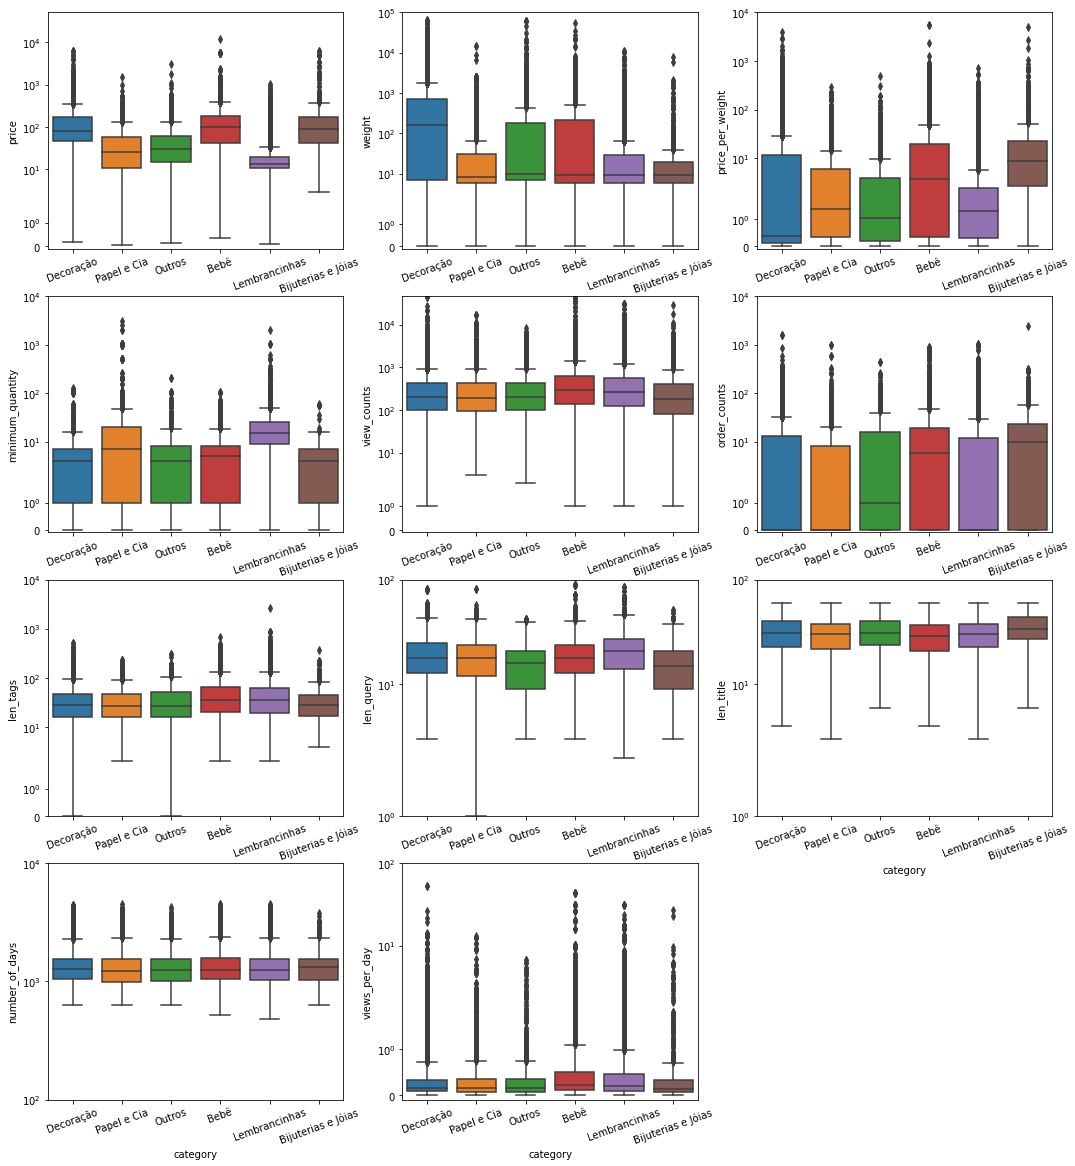

In [29]:
fig, axs = plt.subplots(4, 3, figsize=(18, 20))
sns.boxplot(x=df['category'], y=df['price'], ax=axs[0][0])
sns.boxplot(x=df['category'], y=df['weight'], ax=axs[0][1])
sns.boxplot(x=df['category'], y=df['price_per_weight'], ax=axs[0][2])

sns.boxplot(x=df['category'], y=df['minimum_quantity'], ax=axs[1][0])
sns.boxplot(x=df['category'], y=df['view_counts'], ax=axs[1][1])
sns.boxplot(x=df['category'], y=df['order_counts'], ax=axs[1][2])

sns.boxplot(x=df['category'], y=df['len_tags'], ax=axs[2][0])
sns.boxplot(x=df['category'], y=df['len_query'], ax=axs[2][1])
sns.boxplot(x=df['category'], y=df['len_title'], ax=axs[2][2])

sns.boxplot(x=df['category'], y=df['number_of_days'], ax=axs[3][0])
sns.boxplot(x=df['category'], y=df['views_per_day'], ax=axs[3][1])

axs[3][2].axis('off')

for ax in [axs[i][j] for i in range(4) for j in range(3)][:-1]:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
    ax.set_yscale('symlog')

axs[0][0].set_ylim(bottom=-1e-1, top=5e4)
axs[0][1].set_ylim(bottom=-1e-1, top=1e5)
axs[0][2].set_ylim(bottom=-1e-1, top=1e4)

axs[1][0].set_ylim(bottom=-1e-1, top=1e4)
axs[1][1].set_ylim(bottom=-1e-1)
axs[1][2].set_ylim(bottom=-1e-1, top=1e4)

axs[2][0].set_ylim(bottom=0, top=1e4)
axs[2][1].set_ylim(bottom=1, top=1e2)
axs[2][2].set_ylim(bottom=1, top=1e2)

axs[3][0].set_ylim(bottom=1e2, top=1e4)
axs[3][1].set_ylim(bottom=-1e-1, top=1e2)

plt.show()

Já as variáveis `search_page`, `position` e `order_probability` apresentam um intervalo de números um pouco menor e podem ser visualizados em escala linear. A visualização da variável `orders_per_day` ficou ruim tanto em escala logarítmica quanto linear. Seguem os gráficos de boxplot destas variáveis em escala linear e também com os valores separados por `category`.

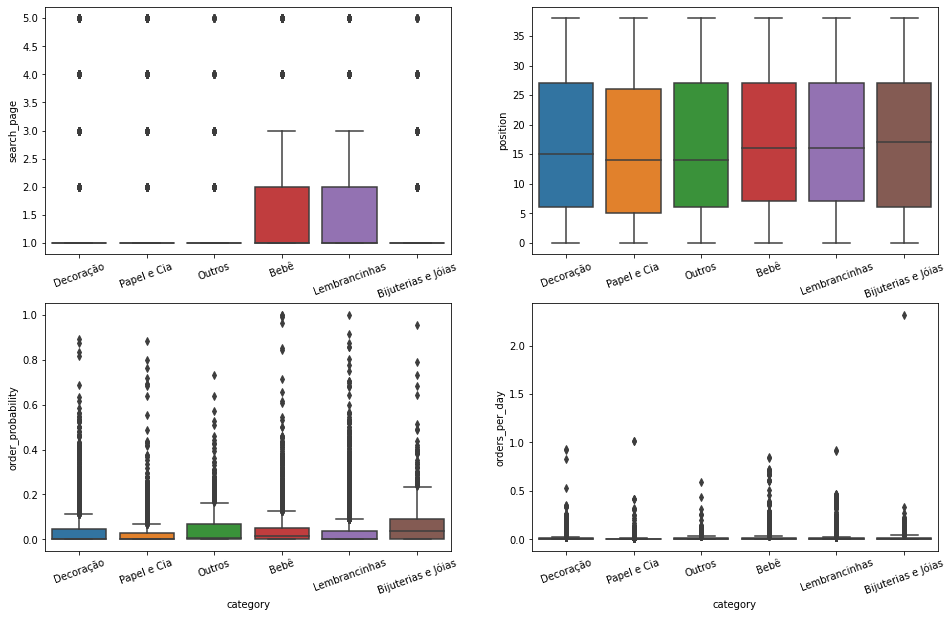

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

sns.boxplot(x=df['category'], y=df['search_page'], ax=axs[0][0])
sns.boxplot(x=df['category'], y=df['position'], ax=axs[0][1])
sns.boxplot(x=df['category'], y=df['order_probability'], ax=axs[1][0])
sns.boxplot(x=df['category'], y=df['orders_per_day'], ax=axs[1][1])

for ax in [axs[i][j] for i in range(2) for j in range(2)]:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=20)

De fato, com exceção das variáveis `position` e `len_title`, os dados apresentam muitos outliers. Porém como é de se esperar que variáveis como `price` e `weight` tenham de fato uma distribuição de valores com muita variabilidade, a remoção dos outliers pode prejudicar a análise distorcendo ou enviesando o resultado final.